## Importing Libraries

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
import os
import warnings
warnings.filterwarnings('ignore')

## Data Analysis

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

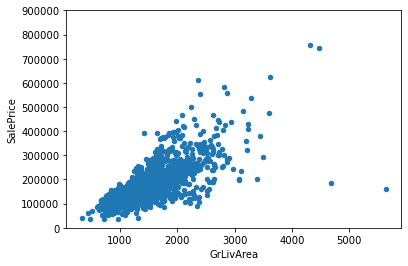

In [4]:
data = pd.concat([train_df['SalePrice'], train_df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,900000));

Positive correlation between SalePrice and livng area square footage

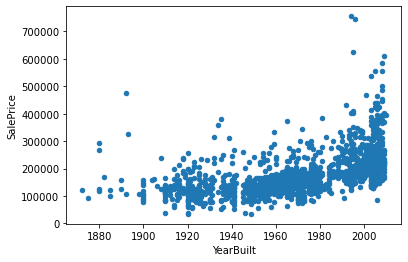

In [5]:
data = pd.concat([train_df['SalePrice'], train_df['YearBuilt']], axis=1)
data.plot.scatter(x='YearBuilt', y='SalePrice');

Exponential like correlation between SalePrice and YearBuilt

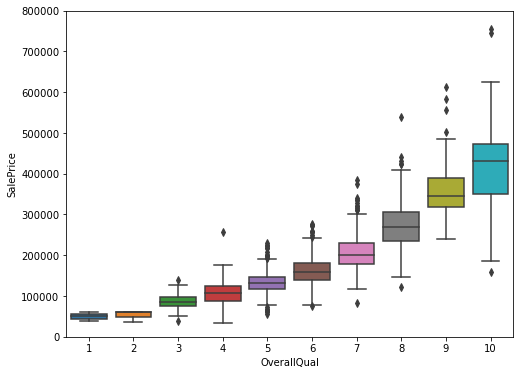

In [6]:
data = pd.concat([train_df['SalePrice'], train_df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Positive correlation between SalePrice and OverallQual

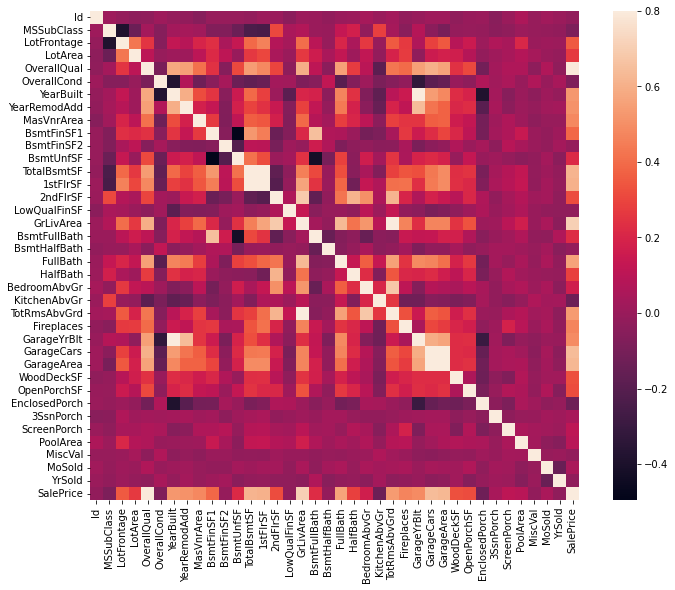

In [7]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Corrleation between features

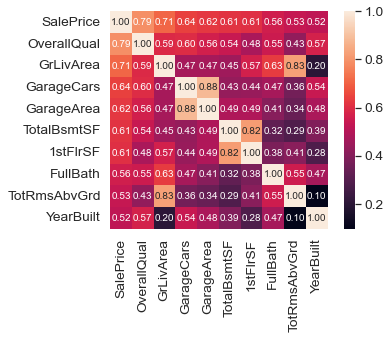

In [8]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Correlation between top 10 most correlated features with respect to SalePrice

## Data Processing

In [9]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Id                0  0.000000
Functional        0  0.000000
Fireplaces        0  0.000000
KitchenQual       0  0.000000
KitchenAbvGr      0  0.000000
BedroomAbvGr      0  0.000000

In [10]:
train_df = train_df.drop((missing_data[missing_data['Total'] > 1]).index,1)
train_df = train_df.drop(train_df.loc[train_df['Electrical'].isnull()].index)
print("Number of missing data in dataframe:", train_df.isnull().sum().max())

Number of missing data in dataframe: 0


C:\Users\tman0\AppData\Local\Temp/ipykernel_9720/1275121959.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_df = train_df.drop((missing_data[missing_data['Total'] > 1]).index,1)


Removing features with missing data

In [11]:
train = pd.get_dummies(train_df)

Converting categorical data to numerical data

In [14]:
train_max = train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]

In [15]:
train_max

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455     175000            6       1647           2         460          953   
1456     210000            6       2073           2         500         1542   
1457     266500            7       2340           1         252         1152   
1458     142125            5       1078           1         240         1078   
1459     147500            5       1256           1         276         1256   

      1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  
0          856         2             8       2003  
1         1262         2             6       1976  
2          920         2             6       2001  
3          961         1             7       1915  
4         1145         2             9       2000  
...        ...       ...           ...        ...  
1455       953         2             7       1999  
1456      2073         2             7       1978  
1457      1188         2             9       1941  
1458      1078         1             5       1950  
1459      1256         1             6       1965  

[1459 rows x 10 columns]

## Trying Base Models

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
y = train['SalePrice']
x = train.drop('SalePrice', axis = 1)

y_max = train_max['SalePrice']
x_max = train_max.drop('SalePrice', axis = 1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(x_max, y_max, test_size=0.3, random_state=0)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

C:\Users\tman0\anaconda3\envs\pytorch-env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [32]:
n_est_params = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_depth_params = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
f_model_acc = [0, 0, 0]

In [33]:
for i in n_est_params:
    for j in max_depth_params:
        f_model = RandomForestRegressor(n_estimators=i, max_depth=j)
        f_model.fit(X_train, y_train)
        print(f_model.score(X_test, y_test))
        if f_model.score(X_test, y_test) > f_model_acc[0]:
            f_model_acc[0] = f_model.score(X_test, y_test)
            f_model_acc[1] = i
            f_model_acc[2] = j

0.8361189570938627
0.8348311695162238
0.842487534140385
0.8595168009451983
0.8696001390993628
0.8522088640005641
0.8429201935847392
0.860177872945903
0.8653824711425824
0.8600475374915078
0.8758910999703035
0.8511997626328202
0.8576421704865557
0.8724260840165173
0.8809668832041522
0.8678151235904853
0.8646477488938742
0.8724391508768243
0.8761749492493499
0.8695806177999296
0.8608210096505466
0.8816931528989169
0.8443334804644469
0.8505870660624297
0.862350665697123
0.8717133301314165
0.8757144603676614
0.8660279478563623
0.8749627972392645
0.8700104328808684
0.8723912921329815
0.8740923573685253
0.8740826599791902
0.8492818776991289
0.8666591174144966
0.8690528310486201
0.8682779916315593
0.8667493062652778
0.87510772763879
0.8792803318687268
0.8716624625169926
0.8777022003795607
0.8741951673699911
0.8766881055573768
0.843687422195342
0.8577187715253335
0.8676077445955502
0.873701235346896
0.876782537716246
0.8713722888599493
0.8782203611565071
0.8725441065906882
0.8729996342240616
0

In [34]:
print("Highest acc:", f_model_acc[0], "with n_est:", f_model_acc[1], "and max_depth:", f_model_acc[2])

Highest acc: 0.8821062610925402 with n_est: 70 and max_depth: 10


In [50]:
forest_model = RandomForestRegressor(n_estimators=70, max_depth=10)
forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=70)

In [51]:
print("Test set score: {:.2f}".format(forest_model.score(X_test, y_test)))

Test set score: 0.88


In [75]:
n_est_params = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
max_depth_params = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
x_model_acc = [0, 0, 0, 0]

In [76]:
from sklearn.model_selection import cross_val_score, KFold

In [77]:
for i in n_est_params:
    for j in max_depth_params:
        for k in learning_rate:
            x_model = XGBRegressor(n_estimators=i, max_depth=j)
            x_model.fit(X_train, y_train)
            kfold = KFold(n_splits=10, shuffle=True)
            kf_cv_scores = cross_val_score(x_model, X_train, y_train, cv=kfold)
            print(kf_cv_scores.mean())
            if kf_cv_scores.mean() > x_model_acc[0]:
                x_model_acc[0] = kf_cv_scores.mean()
                x_model_acc[1] = i
                x_model_acc[2] = j
                x_model_acc[3] = k

0.8619688657123561
0.866897921233566
0.8502463980326486
0.8449190620657682
0.7763132500177231
0.8671694769812397
0.8391536378181653
0.8334264497283049
0.8243883638804398
0.8273154179597266
0.832139308551937
0.8462322793487985
0.8208883766883257
0.829355887764614
0.8379182457163413
0.8320381060660468
0.8407003198617021
0.8610468428053732
0.7996942818440582
0.8225779225053284
0.8252852532270649
0.8083773615176243
0.8403096508048765
0.8417984784835625
0.832970746474637
0.8436388014327866
0.6975199914544544
0.8329881344528566
0.8005774184396361
0.8339026519903643
0.8353536590606694
0.839357761158596
0.8446875166634108
0.7866907354300439
0.8148775796191764
0.8290508339126521
0.7982910955064677
0.8277745601145698
0.8342591350359134
0.8577241044883962
0.8440738739176616
0.85167782905909
0.8183369031341687
0.8036891058059487
0.8497557265057806
0.8300525097361046
0.8432950936399681
0.8445074189500186
0.8203507034004669
0.8450420493008481
0.8543322936574519
0.8419000504382232
0.8367915193108745


0.8228834505643535
0.838542516639954
0.8356414306118024
0.8518920770265732
0.8164680570414535
0.8310870184438034
0.8230953076045106
0.8371698168688448
0.8417189582779461
0.8519724835728635
0.8321147594620145
0.8309225989676567
0.8150202462487541
0.8264512861222251
0.8074132677820278
0.8145180035125719
0.8264981282325994
0.7883614474121623
0.8478466461812635
0.8302235492760281
0.8318858856061473
0.8431265585883236
0.8377911790332628
0.8373959656377638
0.8265991516088868
0.8333282550979225
0.8364807261752218
0.8334843691397911
0.8668108333809308
0.8514338117623149
0.8479578801424212
0.8512971905848092
0.83260284470095
0.8313246683703485
0.8160963249797939
0.8674182688572165
0.8389530350455697
0.8486267310891675
0.856723628355663
0.8281210604931977
0.8482960668314549
0.8211514826959352
0.8606621964027219
0.846622028547937
0.8180459204094683
0.8207273942766363
0.8375526202193028
0.8378656225275002
0.8662921214253905
0.8305861409294193
0.8480884295386998
0.8490466940971823
0.844469380604718

In [78]:
print("Highest acc:", x_model_acc[0], "\nn_est:", x_model_acc[1], "\nmax_depth:", x_model_acc[2], "\nlearning rate:", x_model_acc[3])

Highest acc: 0.8773828724393873 
n_est: 140 
max_depth: 5 
learning rate: 0.2


In [87]:
xg_model = XGBRegressor(n_estimators=140, max_depth=5, learning_rate=0.2)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=140, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

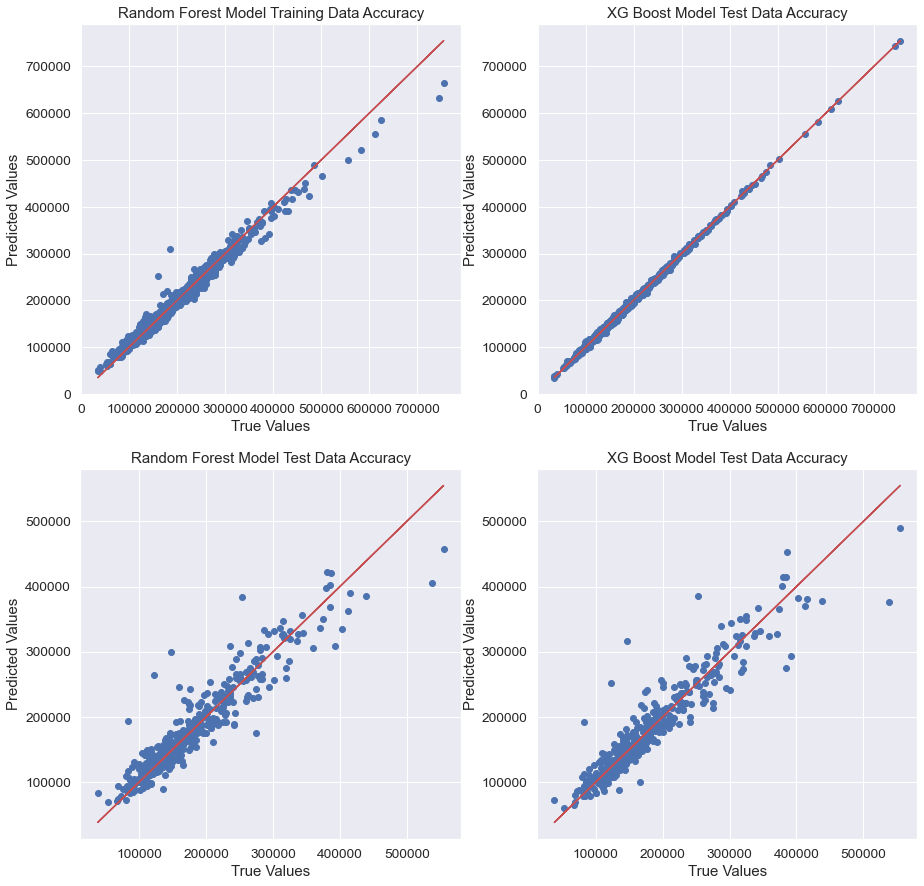

In [103]:
f, ax = plt.subplots(2, 2, figsize=(15,15))
ax[0,0].plot(y_train, y_train, 'r-')
ax[0,0].set(title='Random Forest Model Training Data Accuracy', xlabel='True Values', ylabel='Predicted Values')
ax[0,0].scatter(y_train, forest_model.predict(X_train))

ax[1,0].plot(y_test, y_test, 'r-')
ax[1,0].set(title='Random Forest Model Test Data Accuracy', xlabel='True Values', ylabel='Predicted Values')
ax[1,0].scatter(y_test, forest_model.predict(X_test))

ax[0,1].plot(y_train, y_train, 'r-')
ax[0,1].set(title='XG Boost Model Test Data Accuracy', xlabel='True Values', ylabel='Predicted Values')
ax[0,1].scatter(y_train, xg_model.predict(X_train))

ax[1,1].plot(y_test, y_test, 'r-')
ax[1,1].set(title='XG Boost Model Test Data Accuracy', xlabel='True Values', ylabel='Predicted Values')
ax[1,1].scatter(y_test, xg_model.predict(X_test))